In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Read cleaned data

df = pd.read_csv('data/cleaned_credit_data.csv')
print(df.shape)
df.head()

(6015, 14)


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,28,34847,2,4,0.06,1,3,4,2,Good,605,0.33,326,Good
1,34,143162,1,5,0.08,3,8,6,3,Good,1303,0.38,220,Standard
2,34,131313,0,1,0.08,2,0,2,4,Good,352,0.29,374,Good
3,24,114838,2,5,0.07,3,11,11,8,Good,1377,0.28,263,Standard
4,36,54392,6,4,0.14,3,10,8,7,Standard,179,0.33,329,Standard


In [5]:
df.Credit_Score.value_counts(normalize=True).sort_index()

Good        0.200166
Poor        0.284954
Standard    0.514879
Name: Credit_Score, dtype: float64

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_2443/3390658409.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


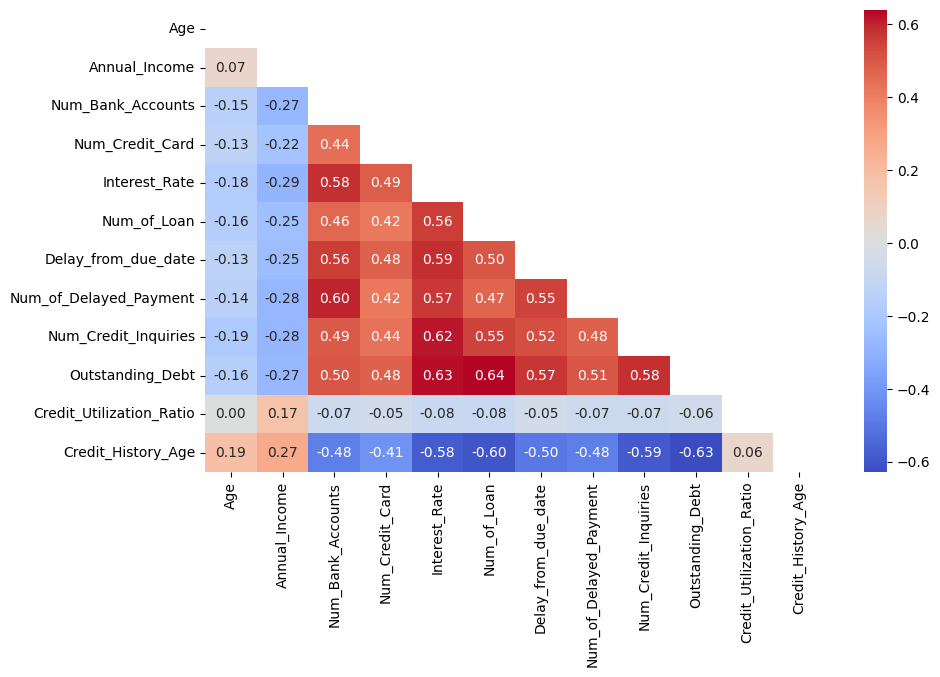

In [6]:
# Correlation Heat Map

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create seaborn heatmap with masked lower triangle
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the horizontal size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, ax=ax)  # Format values to 2 decimal places

# Display the heatmap
plt.show()

In [7]:
df.columns

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Credit_Score'],
      dtype='object')

In [8]:
df2 = df.__deepcopy__()
df2.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Score
0,28,34847,2,4,0.06,1,3,4,2,Good,605,0.33,326,Good
1,34,143162,1,5,0.08,3,8,6,3,Good,1303,0.38,220,Standard
2,34,131313,0,1,0.08,2,0,2,4,Good,352,0.29,374,Good
3,24,114838,2,5,0.07,3,11,11,8,Good,1377,0.28,263,Standard
4,36,54392,6,4,0.14,3,10,8,7,Standard,179,0.33,329,Standard


In [9]:
df2 = pd.get_dummies(df2)
df2.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
0,28,34847,2,4,0.06,1,3,4,2,605,0.33,326,0,1,0,1,0,0
1,34,143162,1,5,0.08,3,8,6,3,1303,0.38,220,0,1,0,0,0,1
2,34,131313,0,1,0.08,2,0,2,4,352,0.29,374,0,1,0,1,0,0
3,24,114838,2,5,0.07,3,11,11,8,1377,0.28,263,0,1,0,0,0,1
4,36,54392,6,4,0.14,3,10,8,7,179,0.33,329,0,0,1,0,0,1


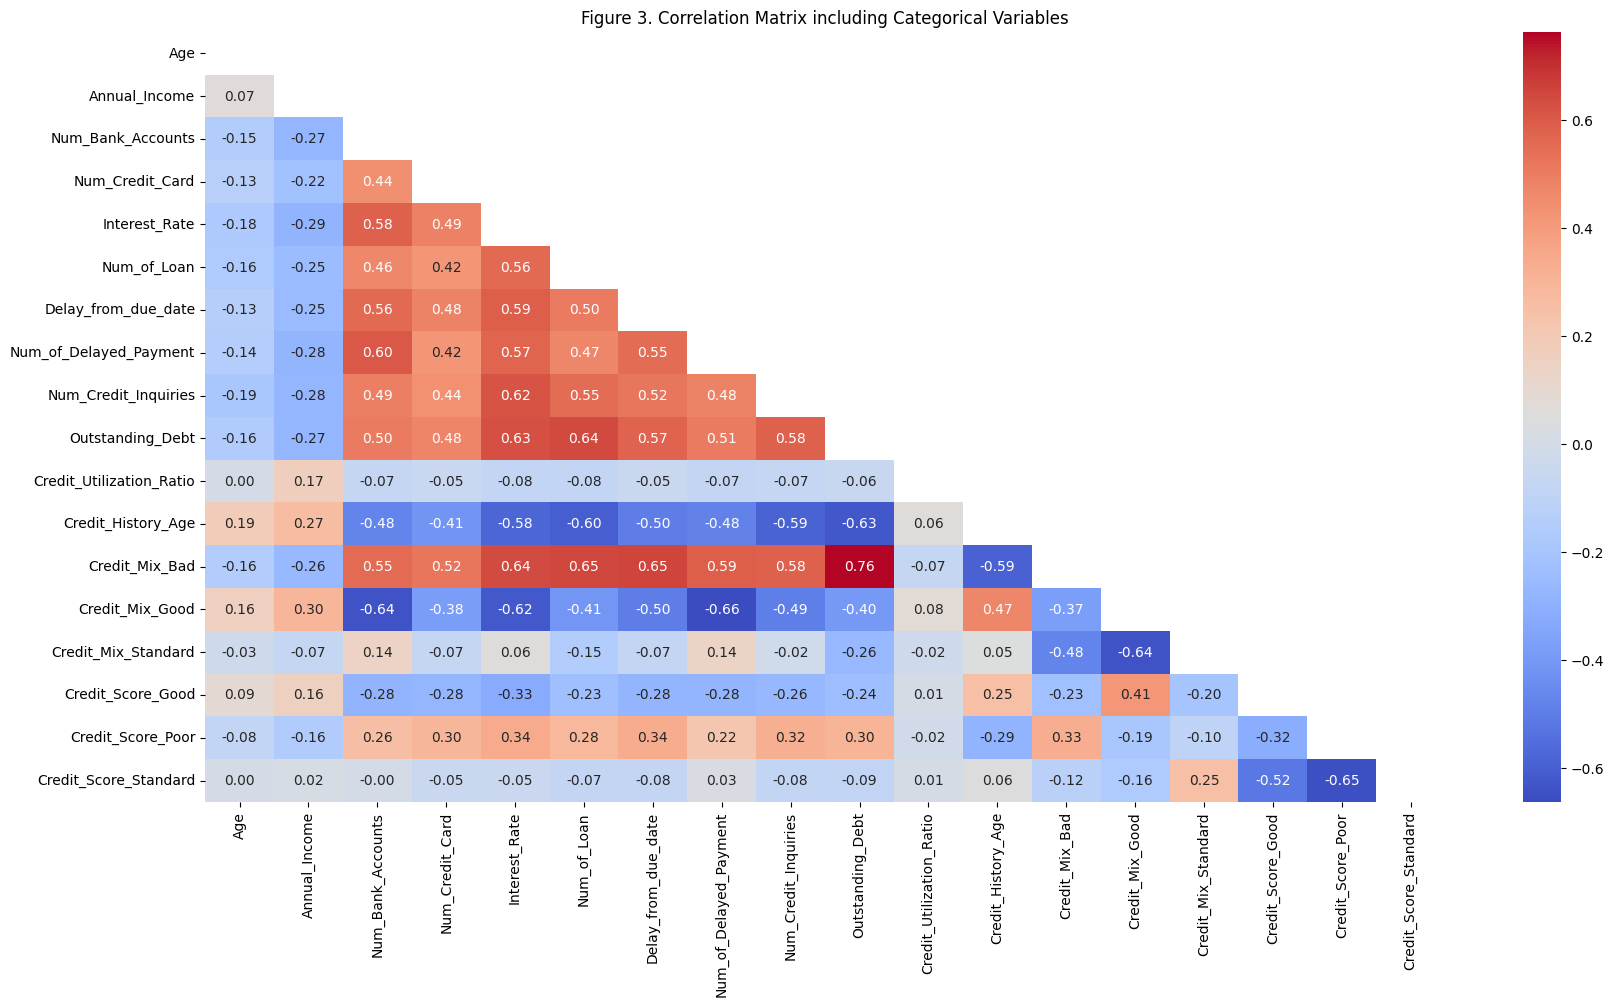

In [17]:
# Correlation Heat Map

# Calculate correlation matrix
correlation_matrix = df2.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create seaborn heatmap with masked lower triangle
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the horizontal size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, ax=ax)  # Format values to 2 decimal places

plt.title("Figure 3. Correlation Matrix including Categorical Variables")

# Display the heatmap
plt.show()